In [1]:
import pandas as pd
df = pd.read_csv("/home/pes1ug19cs430/Downloads/US_Accidents_Dec20_updated.csv", encoding = "ISO-8859-1")
df

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-2716600,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.10891,-83.09286,40.11206,-83.03187,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2716601,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.86542,-84.06280,39.86501,-84.04873,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-2716602,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10266,-84.52468,39.10209,-84.52396,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-2716603,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10148,-84.52341,39.09841,-84.52241,0.219,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
4,A-2716604,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.06213,-81.53784,41.06217,-81.53547,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1516059,A-4239402,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.00248,-117.37936,33.99888,-117.37094,0.543,At Market St - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
1516060,A-4239403,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.76696,-117.14806,32.76555,-117.15363,0.338,At Camino Del Rio/Mission Center Rd - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
1516061,A-4239404,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.77545,-117.84779,33.77740,-117.85727,0.561,At Glassell St/Grand Ave - Accident. in the ri...,...,False,False,False,False,False,False,Day,Day,Day,Day
1516062,A-4239405,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.99246,-118.40302,33.98311,-118.39565,0.772,At CA-90/Marina Fwy/Jefferson Blvd - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1516064 entries, 0 to 1516063
Data columns (total 47 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   ID                     1516064 non-null  object 
 1   Severity               1516064 non-null  int64  
 2   Start_Time             1516064 non-null  object 
 3   End_Time               1516064 non-null  object 
 4   Start_Lat              1516064 non-null  float64
 5   Start_Lng              1516064 non-null  float64
 6   End_Lat                1516064 non-null  float64
 7   End_Lng                1516064 non-null  float64
 8   Distance(mi)           1516064 non-null  float64
 9   Description            1516064 non-null  object 
 10  Number                 469969 non-null   float64
 11  Street                 1516064 non-null  object 
 12  Side                   1516064 non-null  object 
 13  City                   1515981 non-null  object 
 14  County            

Text(0.5, 1.0, '% of Missing Values in each Attribute')

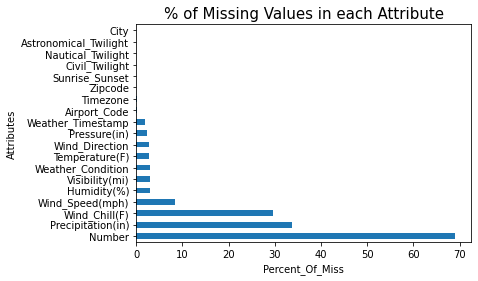

In [8]:
import matplotlib.pyplot as plt
percent_of_miss = df.isna().sum().sort_values(ascending=False) / len(df)
percent_of_miss = percent_of_miss *100
percent_of_miss[percent_of_miss != 0].plot(kind = 'barh')
plt.xlabel('Percent_Of_Miss',fontsize=10)
plt.ylabel('Attributes',fontsize=10)
plt.title('% of Missing Values in each Attribute',fontsize=15)

In [9]:
Precipitation = df['Precipitation(in)']
len(Precipitation[Precipitation == 0])

903429

In [10]:
import numpy as np
df['Precipitation(in)'] = df['Precipitation(in)'].replace(to_replace = np.nan, value = 0 )
df['Temperature(F)'] = df['Temperature(F)'].interpolate()
df['Visibility(mi)'] = df['Visibility(mi)'].interpolate()
df['Sunrise_Sunset'] = df['Sunrise_Sunset'].bfill()

Text(0.5, 1.0, 'Top 20 Cities with most no of Accidents')

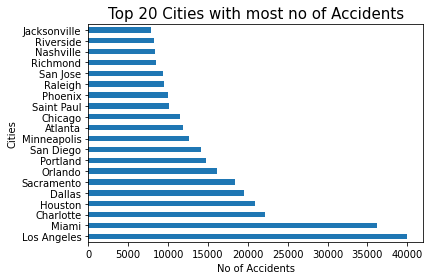

In [11]:
City = df['City'].value_counts()
City[:20].plot(kind = 'barh')
plt.xlabel('No of Accidents',fontsize=10)
plt.ylabel('Cities',fontsize=10)
plt.title('Top 20 Cities with most no of Accidents',fontsize=15)

Text(0.5, 1.0, 'Top 15 States with most no of Accidents')

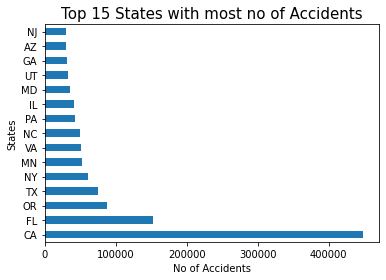

In [12]:
State = df['State'].value_counts()
State[:15].plot(kind = 'barh')
plt.xlabel('No of Accidents',fontsize=10)
plt.ylabel('States',fontsize=10)
plt.title('Top 15 States with most no of Accidents',fontsize=15)

In [13]:
High_acci_Cities = City[City >= 500]
High_acci_States = State[State < 500]
len(High_acci_Cities) / len(City)

#only 5% of cities haev less then 500 yearly accidents

0.05114009571173876

Text(0, 0.5, 'Count')

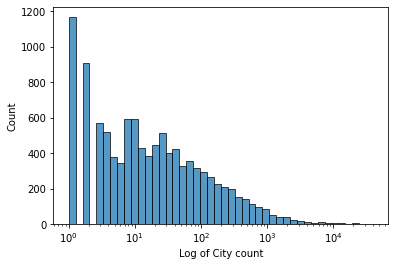

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(City,log_scale=True)
plt.xlabel('Log of City count',fontsize=10)
plt.ylabel('Count',fontsize=10)

#Majority of the cities have only 1 accident and no_of_accidents per city decreases exponentially

Text(0.5, 1.0, 'No of Accidents per Day')

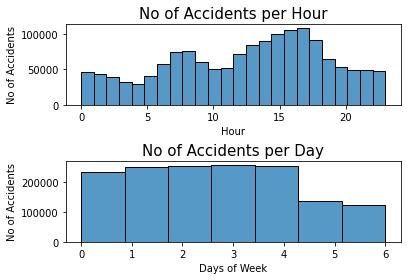

In [16]:
df.Start_Time = pd.to_datetime(df.Start_Time)
plt.subplots_adjust(hspace=0.7)
plt.subplot(2, 1, 1)
sns.histplot(df.Start_Time.dt.hour,bins=24)
plt.xlabel('Hour',fontsize=10)
plt.ylabel('No of Accidents',fontsize=10)
plt.title('No of Accidents per Hour',fontsize=15)
plt.subplot(2, 1, 2)
sns.histplot(df.Start_Time.dt.dayofweek,bins=7)
plt.xlabel('Days of Week',fontsize=10)
plt.ylabel('No of Accidents',fontsize=10)
plt.title('No of Accidents per Day',fontsize=15)

Text(0.5, 1.0, 'No of Accidents on Mondays')

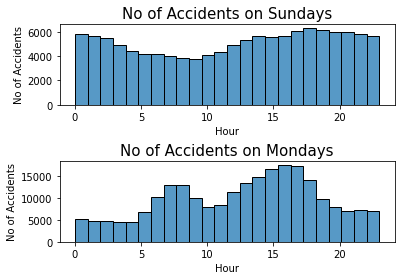

In [17]:
plt.subplots_adjust(hspace=0.7)
plt.subplot(2, 1, 1)
sunday_timings = df.Start_Time[df.Start_Time.dt.dayofweek == 6]
sns.histplot(sunday_timings.dt.hour,bins=24)
plt.xlabel('Hour',fontsize=10)
plt.ylabel('No of Accidents',fontsize=10)
plt.title('No of Accidents on Sundays',fontsize=15)
plt.subplot(2, 1, 2)
monday_timings = df.Start_Time[df.Start_Time.dt.dayofweek == 0]
sns.histplot(monday_timings.dt.hour,bins=24)
plt.xlabel('Hour',fontsize=10)
plt.ylabel('No of Accidents',fontsize=10)
plt.title('No of Accidents on Mondays',fontsize=15)

In [18]:
df['Severity_group'] = 0
df.loc[df['Severity'] == 4 , 'Severity_group'] = 1
df.loc[df['Severity'] == 3 , 'Severity_group'] = 1
#df = df.drop(['Severity'], axis = 1)
df.Severity_group.value_counts()

0    1240560
1     275504
Name: Severity_group, dtype: int64

Text(0.5, 1.0, 'No of Accidents based on Sunrise & Sunset with Severity')

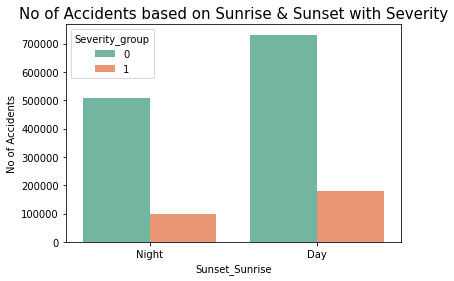

In [19]:
sns.countplot(x='Sunrise_Sunset', hue='Severity_group', data=df ,palette="Set2")
plt.xlabel('Sunset_Sunrise',fontsize=10)
plt.ylabel('No of Accidents',fontsize=10)
plt.title('No of Accidents based on Sunrise & Sunset with Severity',fontsize=15)

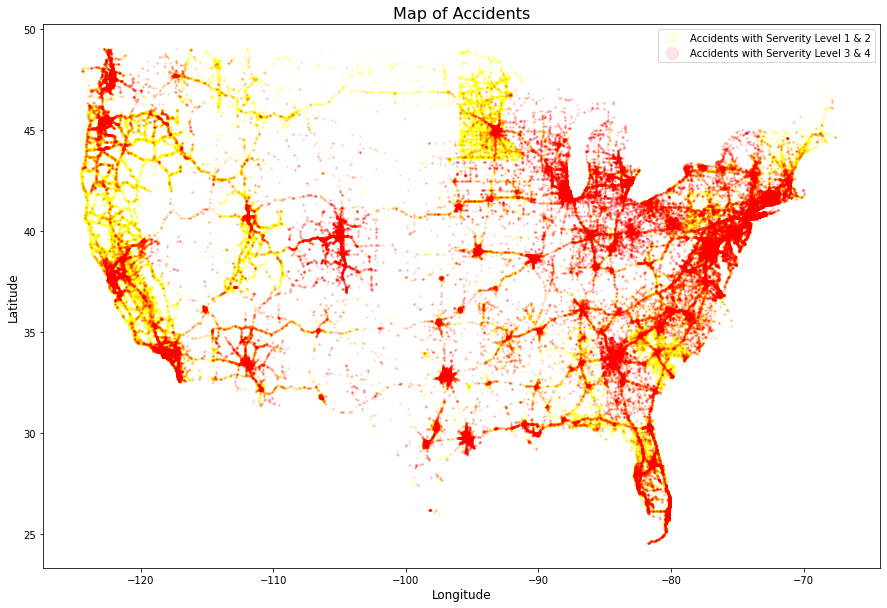

In [20]:
df_group1 = df[df['Severity_group']==0]
df_group2 = df[df['Severity_group']==1]
plt.figure(figsize=(15,10))

plt.plot( 'Start_Lng', 'Start_Lat', data=df_group1, linestyle='', marker='o', markersize=1.5, color="yellow", alpha=0.1, label='Accidents with Serverity Level 1 & 2')
plt.plot( 'Start_Lng', 'Start_Lat', data=df_group2, linestyle='', marker='o', markersize=1.5, color="red", alpha=0.1, label='Accidents with Serverity Level 3 & 4')
plt.legend(markerscale=8)
plt.xlabel('Longitude', size=12, labelpad=3)
plt.ylabel('Latitude', size=12, labelpad=3)
plt.title('Map of Accidents', size=16, y=1)
plt.show()

In [21]:
df['Weather_Condition'].value_counts()[:25]
df['Weather_Condition_Group'] = 'Unsafe for Driving'
df.loc[df['Weather_Condition'] == 'Fair' , 'Weather_Condition_Group'] = 'Perfect weather for driving'
df.loc[df['Weather_Condition'] == 'Clear' , 'Weather_Condition_Group'] = 'Perfect weather for driving'
df.Weather_Condition_Group.value_counts()

Unsafe for Driving             870589
Perfect weather for driving    645475
Name: Weather_Condition_Group, dtype: int64

Text(0.5, 1.0, 'Top 5 Weather Conditions for accidents')

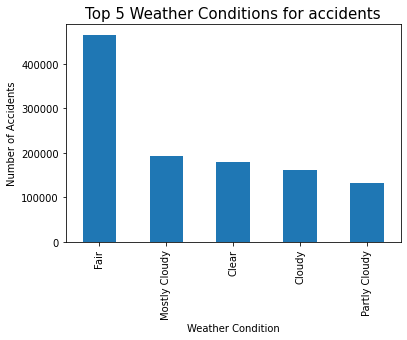

In [22]:
df['Weather_Condition'].value_counts().sort_values(ascending=False).head(5).plot.bar(width=0.5,align='center',linewidth=2)
plt.xlabel('Weather Condition',fontsize=10)
plt.ylabel('Number of Accidents',fontsize=10)
plt.title('Top 5 Weather Conditions for accidents',fontsize=15)

In [23]:
df.shape

(1516064, 49)

In [24]:
df1 = df.sample(n=5000,replace="False")
df1.shape

(5000, 49)

In [25]:
df1

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Severity_group,Weather_Condition_Group
56833,A-2773433,3,2016-11-11 12:07:51,2016-11-11 18:07:51,38.502970,-90.333610,38.503700,-90.339190,0.306,At I-55/Exit 1 - Accident.,...,False,False,False,False,Day,Day,Day,Day,1,Perfect weather for driving
354328,A-3072636,2,2020-12-04 01:51:34,2020-12-04 03:52:04,34.760513,-82.203590,34.762157,-82.202359,0.133,Incident on SC-417 near SCUFFLETOWN RD Drive w...,...,False,False,False,False,Night,Night,Night,Night,0,Unsafe for Driving
402244,A-3121210,2,2020-11-08 17:12:00,2020-11-08 19:19:24.000000000,25.957785,-80.340491,25.955823,-80.342876,0.201,Incident on FLORIDA'S TPKE SB near MM 40 Right...,...,False,False,False,False,Day,Day,Day,Day,0,Unsafe for Driving
1484639,A-4207982,2,2019-08-25 19:49:58,2019-08-25 23:49:58,44.076915,-123.047401,44.077830,-123.047290,0.063,At Beltline Hwy/Exit 195 - Accident.,...,False,False,False,False,Day,Day,Day,Day,0,Perfect weather for driving
157307,A-2873910,2,2017-03-27 17:39:48,2017-03-27 23:39:48,32.799510,-97.225040,32.801440,-97.220490,0.296,At Handley Ederville Rd - Accident.,...,False,False,False,False,Day,Day,Day,Day,0,Unsafe for Driving
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1437506,A-4160849,4,2017-08-22 17:06:45,2017-08-22 23:06:45,30.226490,-95.457760,30.243310,-95.457730,1.162,Closed at FM-1488/Exit 81 - Road closed due to...,...,False,False,False,False,Day,Day,Day,Day,1,Perfect weather for driving
187545,A-2904152,3,2017-04-18 13:53:46,2017-04-18 19:53:46,39.381591,-77.265552,39.381700,-77.264790,0.041,At MD-75/Exit 62 - Accident. Left lane blocked.,...,False,False,False,False,Day,Day,Day,Day,1,Perfect weather for driving
1283765,A-4007107,4,2018-08-03 11:12:07,2018-08-03 17:12:07,28.359670,-81.387730,28.429290,-81.403190,4.901,Closed between SR-417-TOLL/Central Florida Gre...,...,False,False,False,False,Day,Day,Day,Day,1,Unsafe for Driving
698496,A-3421501,2,2020-11-24 19:29:38,2020-11-24 20:59:00,38.810472,-94.885449,38.811221,-94.883763,0.104,Incident on I-35 NB near US-56 Left lane blocked.,...,False,False,False,False,Night,Night,Night,Night,0,Unsafe for Driving


In [26]:
import pandas as pd
print('Null values per variable')
for column in df1.columns:
    print('{}: {} ({}%)'.format(column,pd.isnull(df1[column]).sum(),(pd.isnull(df1[column]).sum()/len(df1))*100))

Null values per variable
ID: 0 (0.0%)
Severity: 0 (0.0%)
Start_Time: 0 (0.0%)
End_Time: 0 (0.0%)
Start_Lat: 0 (0.0%)
Start_Lng: 0 (0.0%)
End_Lat: 0 (0.0%)
End_Lng: 0 (0.0%)
Distance(mi): 0 (0.0%)
Description: 0 (0.0%)
Number: 3410 (68.2%)
Street: 0 (0.0%)
Side: 0 (0.0%)
City: 2 (0.04%)
County: 0 (0.0%)
State: 0 (0.0%)
Zipcode: 0 (0.0%)
Country: 0 (0.0%)
Timezone: 7 (0.13999999999999999%)
Airport_Code: 17 (0.33999999999999997%)
Weather_Timestamp: 109 (2.18%)
Temperature(F): 0 (0.0%)
Wind_Chill(F): 1473 (29.459999999999997%)
Humidity(%): 166 (3.32%)
Pressure(in): 127 (2.54%)
Visibility(mi): 0 (0.0%)
Wind_Direction: 146 (2.92%)
Wind_Speed(mph): 448 (8.959999999999999%)
Precipitation(in): 0 (0.0%)
Weather_Condition: 154 (3.08%)
Amenity: 0 (0.0%)
Bump: 0 (0.0%)
Crossing: 0 (0.0%)
Give_Way: 0 (0.0%)
Junction: 0 (0.0%)
No_Exit: 0 (0.0%)
Railway: 0 (0.0%)
Roundabout: 0 (0.0%)
Station: 0 (0.0%)
Stop: 0 (0.0%)
Traffic_Calming: 0 (0.0%)
Traffic_Signal: 0 (0.0%)
Turning_Loop: 0 (0.0%)
Sunrise_Suns

In [27]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 56833 to 1088258
Data columns (total 49 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   ID                       5000 non-null   object        
 1   Severity                 5000 non-null   int64         
 2   Start_Time               5000 non-null   datetime64[ns]
 3   End_Time                 5000 non-null   object        
 4   Start_Lat                5000 non-null   float64       
 5   Start_Lng                5000 non-null   float64       
 6   End_Lat                  5000 non-null   float64       
 7   End_Lng                  5000 non-null   float64       
 8   Distance(mi)             5000 non-null   float64       
 9   Description              5000 non-null   object        
 10  Number                   1590 non-null   float64       
 11  Street                   5000 non-null   object        
 12  Side                     50

In [28]:
df1.loc[:,'Number'].mean()

8758.637735849057

In [29]:
df1['Number'].fillna(8758,inplace=True)

In [30]:
df1.loc[:,'Temperature(F)'].mean()

59.86746873799013

In [31]:
df1['Temperature(F)'].fillna(60,inplace=True)

In [32]:
df1.loc[:,'Wind_Chill(F)'].mean()

55.44153671675645

In [33]:
df1['Wind_Chill(F)'].fillna(55,inplace=True)

In [34]:
df1.loc[:,'Humidity(%)'].mean()

64.90877120397187

In [35]:
df1['Humidity(%)'].fillna(65,inplace=True)

In [36]:
df1.loc[:,'Pressure(in)'].mean()

29.52910116971065

In [37]:
df1['Pressure(in)'].fillna(30,inplace=True)

In [38]:
df1.loc[:,'Visibility(mi)'].mean()

9.111715333333333

In [39]:
df1['Visibility(mi)'].fillna(9,inplace=True)

In [40]:
df1.loc[:,'Wind_Speed(mph)'].mean()

7.75298769771529

In [41]:
df1['Wind_Speed(mph)'].fillna(7.8,inplace=True)

In [42]:
df1.loc[:,'Precipitation(in)'].mean()

0.004902

In [43]:
df1['Precipitation(in)'].fillna(0.004,inplace=True)

In [44]:
type(df1)

pandas.core.frame.DataFrame

In [45]:
df1.dropna(subset = ["Wind_Direction","Weather_Condition","Zipcode","City","Timezone","Airport_Code","Weather_Timestamp","Sunrise_Sunset","Civil_Twilight","Nautical_Twilight","Astronomical_Twilight"],inplace = True)

In [46]:
df1.isnull().sum()

ID                         0
Severity                   0
Start_Time                 0
End_Time                   0
Start_Lat                  0
Start_Lng                  0
End_Lat                    0
End_Lng                    0
Distance(mi)               0
Description                0
Number                     0
Street                     0
Side                       0
City                       0
County                     0
State                      0
Zipcode                    0
Country                    0
Timezone                   0
Airport_Code               0
Weather_Timestamp          0
Temperature(F)             0
Wind_Chill(F)              0
Humidity(%)                0
Pressure(in)               0
Visibility(mi)             0
Wind_Direction             0
Wind_Speed(mph)            0
Precipitation(in)          0
Weather_Condition          0
Amenity                    0
Bump                       0
Crossing                   0
Give_Way                   0
Junction      

In [47]:
x = df1.iloc[:,[4,5,6,7,8,10,21,22,23,24,25,27,28]].values

In [48]:
y = df1.loc[:,'Severity'].values

In [49]:
#Decision Tree Algorithm
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [50]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1) # 80% training and 20% test

In [51]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)

In [52]:
# Model Accuracy
print("Accuracy of Decision Tree as a classifier is : ",metrics.accuracy_score(y_test, y_pred))

Accuracy of Decision Tree as a classifier is :  0.7274611398963731


In [53]:
df1.drop('ID',axis='columns', inplace=True)
df1.drop('Start_Time',axis='columns', inplace=True)
df1.drop('End_Time',axis='columns', inplace=True)
df1.drop('Description',axis='columns', inplace=True)
df1.drop('Street',axis='columns', inplace=True)
df1.drop('Side',axis='columns', inplace=True)
df1.drop('City',axis='columns', inplace=True)
df1.drop('County',axis='columns', inplace=True)
df1.drop('State',axis='columns', inplace=True)
df1.drop('Zipcode',axis='columns', inplace=True)
df1.drop('Country',axis='columns', inplace=True)
df1.drop('Timezone',axis='columns', inplace=True)
df1.drop('Airport_Code',axis='columns', inplace=True)
df1.drop('Weather_Timestamp',axis='columns', inplace=True)
df1.drop('Wind_Direction',axis='columns', inplace=True)
df1.drop('Weather_Condition',axis='columns', inplace=True)
df1.drop('Amenity',axis='columns', inplace=True)
df1.drop('Bump',axis='columns', inplace=True)
df1.drop('Crossing',axis='columns', inplace=True)
df1.drop('Give_Way',axis='columns', inplace=True)
df1.drop('Junction',axis='columns', inplace=True)
df1.drop('No_Exit',axis='columns', inplace=True)
df1.drop('Railway',axis='columns', inplace=True)
df1.drop('Roundabout',axis='columns', inplace=True)
df1.drop('Station',axis='columns', inplace=True)
df1.drop('Stop',axis='columns', inplace=True)
df1.drop('Traffic_Calming',axis='columns', inplace=True)
df1.drop('Traffic_Signal',axis='columns', inplace=True)
df1.drop('Turning_Loop',axis='columns', inplace=True)
df1.drop('Sunrise_Sunset',axis='columns', inplace=True)
df1.drop('Civil_Twilight',axis='columns', inplace=True)
df1.drop('Nautical_Twilight',axis='columns', inplace=True)
df1.drop('Astronomical_Twilight',axis='columns', inplace=True)

In [54]:
#KNN Algorithm
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 0)
x_train.shape
x_test.shape

(1206, 13)

In [55]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)
x_train

array([[0.55332506, 0.05430807, 0.55284798, ..., 0.02      , 0.15789474,
        0.01136364],
       [0.75392427, 0.87056913, 0.75500985, ..., 0.2       , 0.42105263,
        0.        ],
       [0.66967709, 0.92320498, 0.66977391, ..., 0.2       , 0.39473684,
        0.        ],
       ...,
       [0.59606165, 0.54057419, 0.59608811, ..., 0.2       , 0.12105263,
        0.        ],
       [0.76615158, 0.84350173, 0.76618455, ..., 0.2       , 0.34210526,
        0.        ],
       [0.58082123, 0.85005045, 0.58088032, ..., 0.2       , 0.30263158,
        0.        ]])

In [56]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 14)
knn.fit(x_train,y_train)
acc = knn.score(x_test,y_test)*100
print('[K-Nearest Neighbors (KNN)] accuracy_score: {:.3f}.'.format(acc))

[K-Nearest Neighbors (KNN)] accuracy_score: 78.607.
